In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
df_input = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3,4])

In [5]:
df_output = pd. read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[5,6])

In [6]:
df_input.shape

(143209, 4)

In [7]:
df_output.shape

(143209, 2)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [9]:
print(x_train.shape,x_test.shape)

(128888, 4) (14321, 4)


In [10]:
x_train

,x座標,y座標,z座標,V[V]
109127,-1.004183,-0.548632,-0.324605,0.948683
128525,0.175307,-0.603502,2.846864,1.264911
133186,1.340626,0.192109,-0.324605,1.581139
129129,-0.524488,0.823111,0.540341,1.264911
41588,-0.445895,0.493892,-0.324605,-0.632456
...,...,...,...,...
41993,-1.339156,0.301848,-0.324605,-0.632456
97639,-0.669211,-1.179634,-0.324605,0.632456
95939,0.670681,-0.521198,-0.324605,0.632456
117952,-0.892526,1.262069,-0.901235,1.264911


In [11]:
y_train

,i[A/m^2],c[mol/m^3]
109127,-0.037703,1.128901
128525,-0.898627,1.593496
133186,-0.448425,-0.921826
129129,-0.898627,1.393842
41588,1.179679,-0.921826
...,...,...
41993,1.228230,-0.921826
97639,0.187709,-0.921826
95939,0.184245,-0.921826
117952,-0.267720,-0.921826


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(4,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=2, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は連続値なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [13]:
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mse',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mse",
                                              patience=100,
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])

Train on 128888 samples, validate on 14321 samples
Epoch 1/20000
128888/128888 [==============================] - 3s 25us/sample - loss: 0.2817 - mse: 0.2817 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 2/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.1182 - mse: 0.1182 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 3/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0954 - mse: 0.0954 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 4/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0815 - val_mse: 0.0815
Epoch 5/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0785 - mse: 0.0785 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 6/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0729 - val_mse: 0.0729
Epoch 7/20000
128888/128888 [==============================] - 2s 15us/sample - loss:

128888/128888 [==============================] - 2s 16us/sample - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 58/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 59/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 60/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 61/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 62/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 63/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0613 - val_mse: 0.0613


128888/128888 [==============================] - 2s 15us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 114/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 115/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 116/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 117/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 118/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 119/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0612 - val_mse: 0

128888/128888 [==============================] - 2s 16us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 170/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 171/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 172/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 173/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 174/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 175/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0612 - val_mse: 0

Epoch 225/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 226/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 227/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 228/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 229/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 230/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 231/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0

Epoch 281/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 282/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 283/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 284/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 285/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 286/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 287/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 338/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 339/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 340/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 341/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 342/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 343/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0612 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 394/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 395/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 396/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 397/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 398/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 399/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0603 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 450/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0598 - val_mse: 0.0598
Epoch 451/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 452/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 453/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 454/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0596 - val_mse: 0.0596
Epoch 455/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0600 - val_mse: 0

128888/128888 [==============================] - 2s 19us/sample - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 506/20000
128888/128888 [==============================] - 2s 12us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 507/20000
128888/128888 [==============================] - 1s 8us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 508/20000
128888/128888 [==============================] - 1s 9us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 509/20000
128888/128888 [==============================] - 1s 9us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 510/20000
128888/128888 [==============================] - 1s 9us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 511/20000
128888/128888 [==============================] - 1s 9us/sample - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0580 - val_mse: 0.0580

128888/128888 [==============================] - 2s 14us/sample - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 562/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 563/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 564/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 565/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 566/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 567/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0578 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 618/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 619/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 620/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 621/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 622/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 623/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0579 - val_mse: 0

128888/128888 [==============================] - 2s 17us/sample - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 674/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 675/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 676/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 677/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 678/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 679/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0559 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 730/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 731/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 732/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 733/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 734/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 735/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0560 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 786/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 787/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 788/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 789/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 790/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 791/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0557 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 842/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 843/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 844/20000
128888/128888 [==============================] - 1s 9us/sample - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 845/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 846/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 847/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0544 - val_mse: 0.

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 898/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 899/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 900/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 901/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 902/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 903/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0532 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 954/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 955/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 956/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0516 - val_mse: 0.0516
Epoch 957/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 958/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 959/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0511 - val_mse: 0

128888/128888 [==============================] - 2s 15us/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 1010/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 1011/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 1012/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 1013/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0507 - mse: 0.0507 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 1014/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 1015/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0508 - val_

Epoch 1065/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 1066/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 1067/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 1068/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 1069/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 1070/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 1071/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0504 - mse: 0.0504 - val_lo

Epoch 1121/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0483 - val_mse: 0.0483
Epoch 1122/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 1123/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 1124/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 1125/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 1126/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 1127/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0470 - mse: 0.0470 - val_lo

Epoch 1177/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 1178/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 1179/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 1180/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 1181/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 1182/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 1183/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0462 - mse: 0.0462 - val_lo

Epoch 1233/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 1234/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 1235/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 1236/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 1237/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 1238/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 1239/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0461 - mse: 0.0461 - val_lo

Epoch 1289/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 1290/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0457 - val_mse: 0.0457
Epoch 1291/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 1292/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 1293/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 1294/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 1295/20000
128888/128888 [==============================] - 2s 19us/sample - loss: 0.0458 - mse: 0.0458 - val_lo

Epoch 1345/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 1346/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 1347/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 1348/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 1349/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 1350/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 1351/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0456 - mse: 0.0456 - val_lo

Epoch 1401/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 1402/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 1403/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 1404/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 1405/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 1406/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 1407/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0445 - mse: 0.0445 - val_lo

Epoch 1457/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 1458/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 1459/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 1460/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 1461/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 1462/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 1463/20000
128888/128888 [==============================] - 2s 18us/sample - loss: 0.0431 - mse: 0.0431 - val_lo

Epoch 1513/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 1514/20000
128888/128888 [==============================] - 2s 12us/sample - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 1515/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 1516/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 1517/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 1518/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 1519/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_lo

Epoch 1569/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 1570/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 1571/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 1572/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 1573/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 1574/20000
128888/128888 [==============================] - 2s 14us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 1575/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_lo

Epoch 1625/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 1626/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 1627/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 1628/20000
128888/128888 [==============================] - 2s 17us/sample - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 1629/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 1630/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 1631/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0425 - mse: 0.0425 - val_lo

Epoch 1681/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 1682/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 1683/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 1684/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 1685/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 1686/20000
128888/128888 [==============================] - 2s 16us/sample - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0430 - val_mse: 0.0430
Epoch 1687/20000
128888/128888 [==============================] - 2s 15us/sample - loss: 0.0424 - mse: 0.0424 - val_lo

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

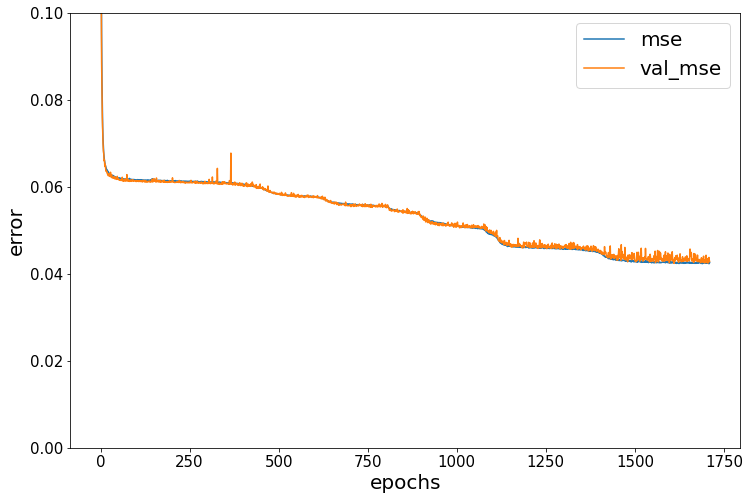

In [18]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,0.1))
plt.legend(loc = 'best',fontsize=20)
plt.savefig('mse_transition.png')
plt.show()

In [19]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [20]:
model.save('i_predict CD_3D+O2dist')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: i_predict CD_3D+O2dist\assets
